# Binary Classification on Breast Cancer Data

## Purpose of this project
The goal of this project is to analyze and compare between two machine learning algorithms, specifically for binary classification tasks on a non-linear dataset. Through this comparison, we aim to highlight the strengths, limitations, and applicability of each model. 

We begin by analyzing the dataset and implementing the Perceptrom Learning Algorithm, a foundational model in machine learning. The perceptron lays the groundwork for more complex models by using a linear decision boundary to classify data points. 

Next, we explore logistic regression, a probabilistic linear classifier that optimizes log loss and outputs calibrated class probabilities. Unlike perceptron's mistake-driven updates, logistic regression minimizes a convenx objective that makes training stable on non linearly separable data. 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
from imblearn.pipeline import make_pipeline as imb_make_pipeline
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split, learning_curve, StratifiedKFold, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix, ConfusionMatrixDisplay, roc_auc_score
from sklearn.linear_model import Perceptron
from sklearn.model_selection import learning_curve, StratifiedKFold, cross_validate
from sklearn.pipeline import make_pipeline
from sklearn.neural_network import MLPClassifier
import warnings
%matplotlib inline
warnings.filterwarnings('ignore')

## Import data

In [2]:
dataset = pd.read_csv(r"Breast_cancer_data.csv")
pd.set_option('display.max.columns', None)
pd.set_option('display.max.rows', None)
print(dataset.head(10))

   mean_radius  mean_texture  mean_perimeter  mean_area  mean_smoothness  \
0        17.99         10.38          122.80     1001.0          0.11840   
1        20.57         17.77          132.90     1326.0          0.08474   
2        19.69         21.25          130.00     1203.0          0.10960   
3        11.42         20.38           77.58      386.1          0.14250   
4        20.29         14.34          135.10     1297.0          0.10030   
5        12.45         15.70           82.57      477.1          0.12780   
6        18.25         19.98          119.60     1040.0          0.09463   
7        13.71         20.83           90.20      577.9          0.11890   
8        13.00         21.82           87.50      519.8          0.12730   
9        12.46         24.04           83.97      475.9          0.11860   

   diagnosis  
0          0  
1          0  
2          0  
3          0  
4          0  
5          0  
6          0  
7          0  
8          0  
9          0 

In [3]:
print(dataset.tail())

     mean_radius  mean_texture  mean_perimeter  mean_area  mean_smoothness  \
564        21.56         22.39          142.00     1479.0          0.11100   
565        20.13         28.25          131.20     1261.0          0.09780   
566        16.60         28.08          108.30      858.1          0.08455   
567        20.60         29.33          140.10     1265.0          0.11780   
568         7.76         24.54           47.92      181.0          0.05263   

     diagnosis  
564          0  
565          0  
566          0  
567          0  
568          1  


In [4]:
print(dataset.describe())

       mean_radius  mean_texture  mean_perimeter    mean_area  \
count   569.000000    569.000000      569.000000   569.000000   
mean     14.127292     19.289649       91.969033   654.889104   
std       3.524049      4.301036       24.298981   351.914129   
min       6.981000      9.710000       43.790000   143.500000   
25%      11.700000     16.170000       75.170000   420.300000   
50%      13.370000     18.840000       86.240000   551.100000   
75%      15.780000     21.800000      104.100000   782.700000   
max      28.110000     39.280000      188.500000  2501.000000   

       mean_smoothness   diagnosis  
count       569.000000  569.000000  
mean          0.096360    0.627417  
std           0.014064    0.483918  
min           0.052630    0.000000  
25%           0.086370    0.000000  
50%           0.095870    1.000000  
75%           0.105300    1.000000  
max           0.163400    1.000000  


In [5]:
print(dataset.isnull().sum())

mean_radius        0
mean_texture       0
mean_perimeter     0
mean_area          0
mean_smoothness    0
diagnosis          0
dtype: int64


In [6]:
X = dataset.drop(['diagnosis'], axis=1)
y = dataset['diagnosis']

In [7]:
class_counts = y.value_counts()

1 -> Malignant

0 -> Benign

It is a fairly imbalanced dataset. One way to solve this is to implement Synthetic minority oversampling technique. It is one of the most commonly used oversampling  methods to solve the imbalance problem.

([<matplotlib.axis.XTick at 0x1fd29f6e3c0>,
 [Text(1, 0, 'Class 1'), Text(0, 0, 'Class 0')])

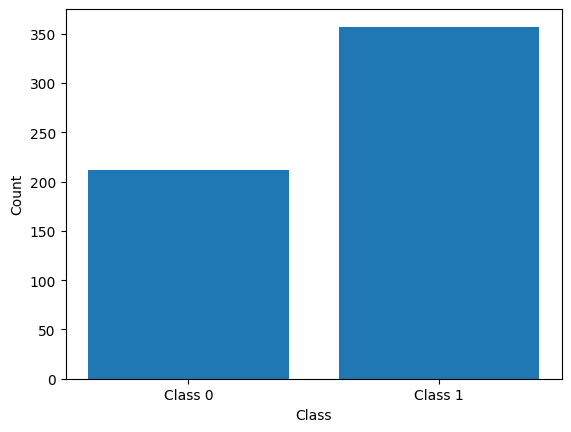

In [8]:
plt.bar(class_counts.index, class_counts.values)
plt.xlabel('Class')
plt.ylabel('Count')
plt.xticks(class_counts.index, ['Class 1', 'Class 0'])

## Understanding the Data
Each feature represents different measurement of tumors. The diagnosis columns represents the outcome whether the tumor is benign (0) or malignant (1).

<div>
<center>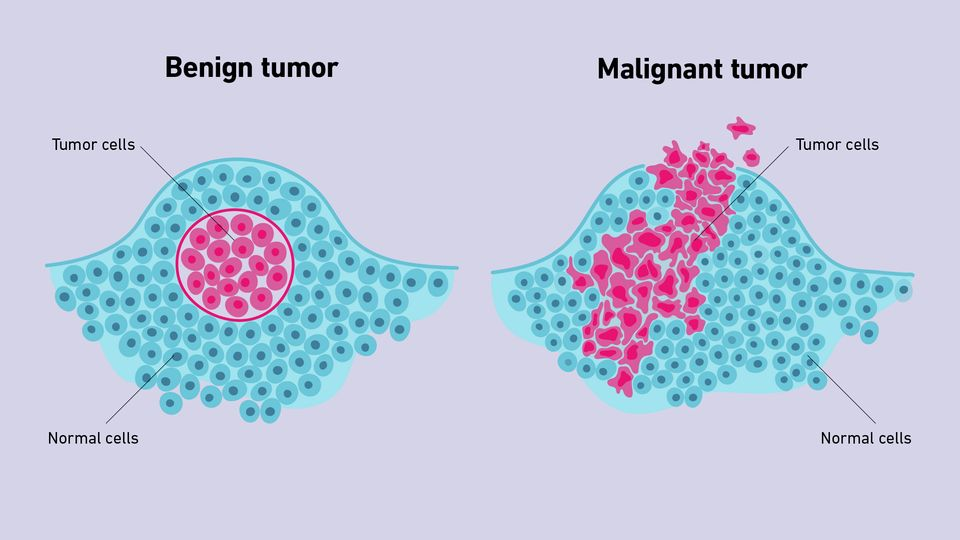</center>
</div>

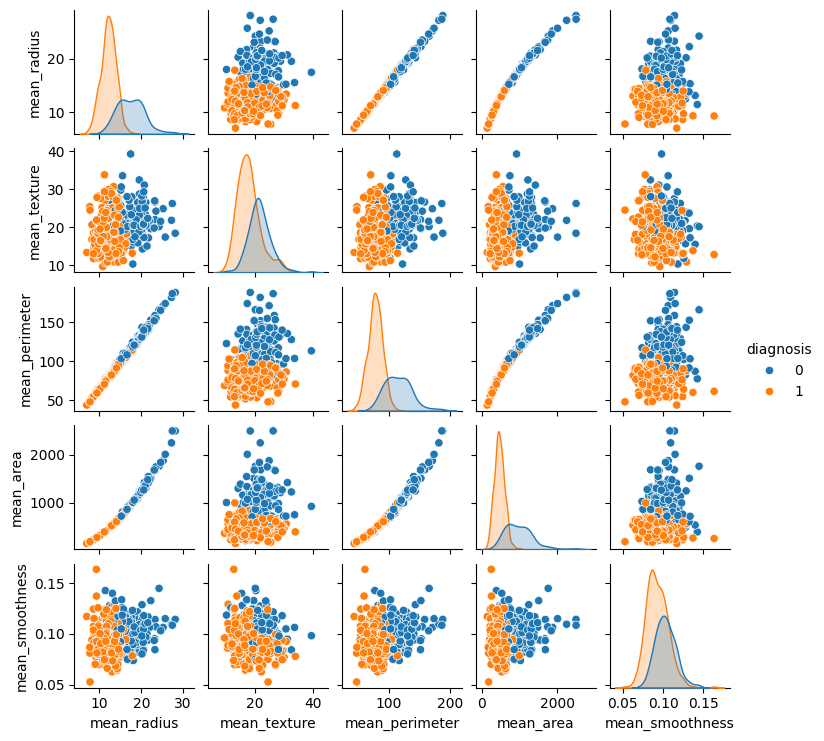

In [9]:
sns.pairplot(dataset.select_dtypes(['number']), hue='diagnosis', height=1.5)

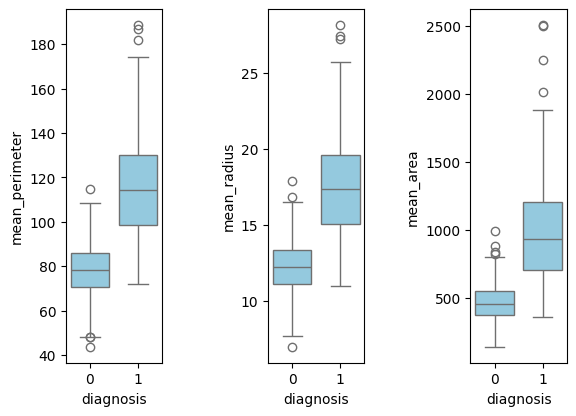

In [10]:
dataset['diagnosis'] = dataset['diagnosis'].apply(lambda x: 1 if x == 0 else 0)
viz_features = ['mean_perimeter', 'mean_radius', 'mean_area']
for i, feature in enumerate(viz_features):
    plt.subplot(1, len(viz_features), i+1)
    sns.boxplot(x='diagnosis', y=feature, data=dataset, color='skyblue')
plt.tight_layout(pad=3.0)

Malignant tumors have larger values for mean perimeters, mean radius, and mean area. While benign tumors tend to be smaller and regular in shape.

## Comparison

<div>
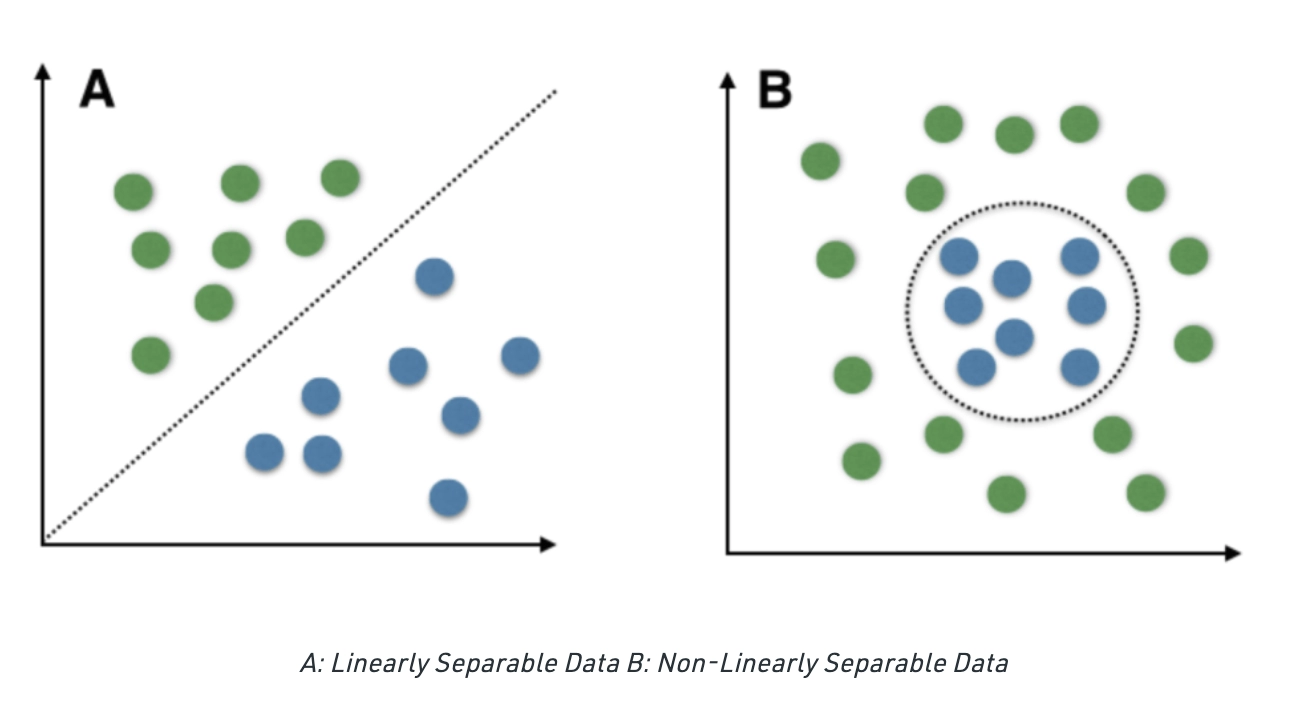

Our dataset from the pairplot is not linearly separable. My prediction is that a simple  model like the single perceptron learning algorithm might not be sufficient to achieve high accuracy in our binary classification task. 

In [11]:
dataset.corr()

,mean_radius,mean_texture,mean_perimeter,mean_area,mean_smoothness,diagnosis
mean_radius,1.000000,0.323782,0.997855,0.987357,0.170581,0.730029
mean_texture,0.323782,1.000000,0.329533,0.321086,-0.023389,0.415185
mean_perimeter,0.997855,0.329533,1.000000,0.986507,0.207278,0.742636
mean_area,0.987357,0.321086,0.986507,1.000000,0.177028,0.708984
mean_smoothness,0.170581,-0.023389,0.207278,0.177028,1.000000,0.358560
diagnosis,0.730029,0.415185,0.742636,0.708984,0.358560,1.000000


<Axes: >

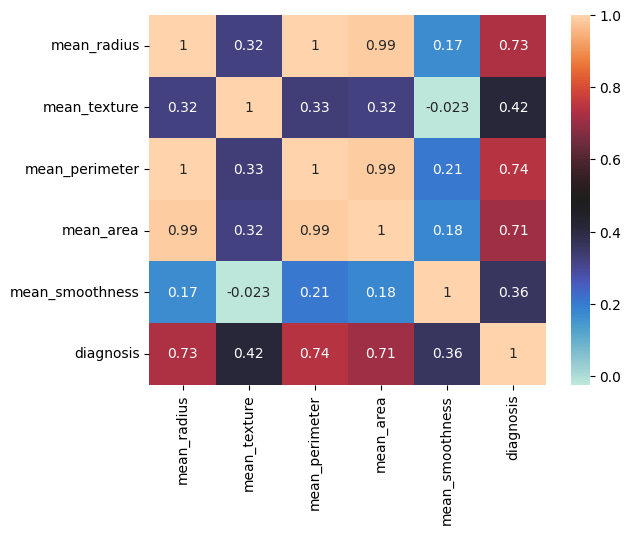

In [12]:
sns.heatmap(dataset.corr(), annot=True, cmap="icefire")

Mean radius, mean perimeter, and mean area have strong negative correlations with diagnosis. This indicates that as these features increase, the likelihood of the tumor being malignant (0) increases. (Larger tumors are more likely to be malignant)

## Split the Data

In [13]:
# Splitting the data and obtaining 20% of the data for testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [14]:
# Show dimensions
print(f"X_train shape: { X_train.shape}, y_train shape: {y_train.shape}")
print(f"X_test shape: {X_test.shape}, y_test shape: {y_test.shape}")

X_train shape: (455, 5), y_train shape: (455,)
X_test shape: (114, 5), y_test shape: (114,)


In [15]:
# Scaling our data is a must for SMOTE pick k-nearest minority neighbors using Euclidian distance
scaler = StandardScaler().fit(X_train)
X_train_standard = scaler.transform(X_train)
X_test_standard = scaler.transform(X_test)

In [16]:
smote=SMOTE(sampling_strategy='minority', random_state=42) 
X_train_resampled, y_train_resampled=smote.fit_resample(X_train_standard,y_train)
y_train_resampled.value_counts()

diagnosis
1    285
0    285
Name: count, dtype: int64

## Feature Scaling
An important process in machine learning of normalizing the range of independent variables or features of data in a fixed range. 

Standardizing: Transforming data to have a mean of 0 and a standard deviation of 1.

EDIT: We will not do feature scaling before cross validation because the scaler would "see" the validation fold when computing mean/std. So there will be no leakage and not over optimistic.

## Closer look of our scatterplot

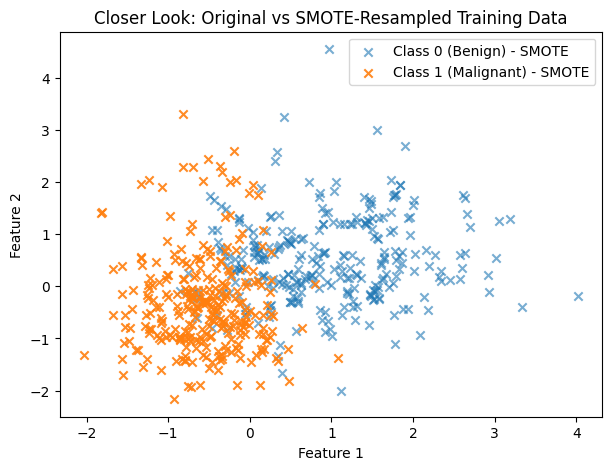

In [17]:
# Convert to NumPy for easy boolean indexing
X_train_np = X_train.to_numpy()
y_train_np = y_train.to_numpy()
X_train_smote_np = np.asarray(X_train_resampled, dtype=np.float64)  # or just X_train_resampled
y_train_smote_np = np.asarray(y_train_resampled, dtype=np.int64)

plt.figure(figsize=(7,5))

# SMOTE‑resampled training data
plt.scatter(X_train_smote_np[y_train_smote_np == 0, 0], X_train_smote_np[y_train_smote_np == 0, 1],
            label='Class 0 (Benign) - SMOTE', alpha=0.6, marker='x')
plt.scatter(X_train_smote_np[y_train_smote_np == 1, 0], X_train_smote_np[y_train_smote_np == 1, 1],
            label='Class 1 (Malignant) - SMOTE', alpha=0.9, marker='x')

plt.title('Closer Look: Original vs SMOTE‑Resampled Training Data')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.show()

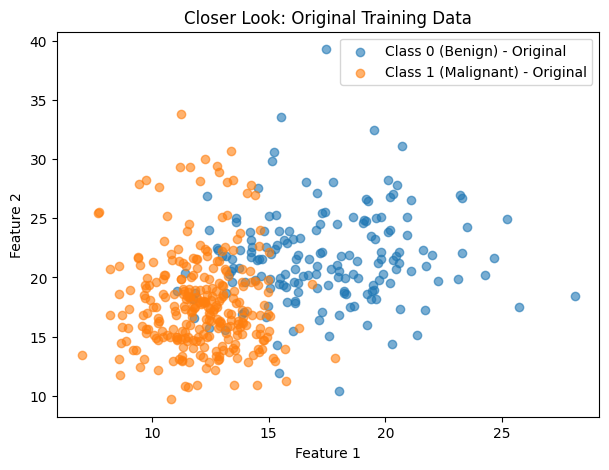

In [18]:
plt.figure(figsize=(7,5))

# Original training data
plt.scatter(X_train_np[y_train_np == 0, 0], X_train_np[y_train_np == 0, 1],
            label='Class 0 (Benign) - Original', alpha=0.6, marker='o')
plt.scatter(X_train_np[y_train_np == 1, 0], X_train_np[y_train_np == 1, 1],
            label='Class 1 (Malignant) - Original', alpha=0.6, marker='o')

plt.title('Closer Look: Original Training Data')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.show()

Many data points are overlapping in the middle that most likely means there will be many missclassifications. 

<Axes: xlabel='mean_perimeter', ylabel='mean_texture'>

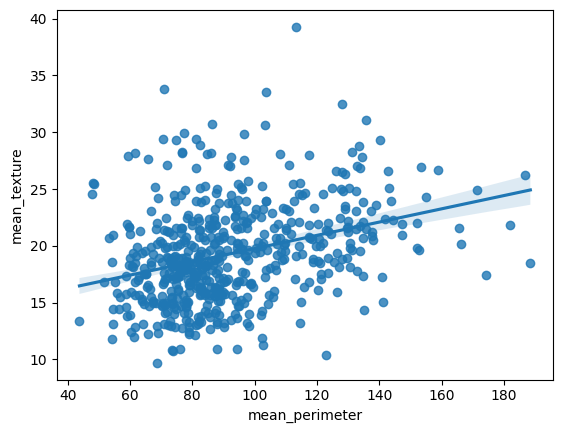

In [19]:
sns.regplot(x='mean_perimeter', y='mean_texture', data=dataset)

## What is the Perceptron Learning Algorithm?

<div>
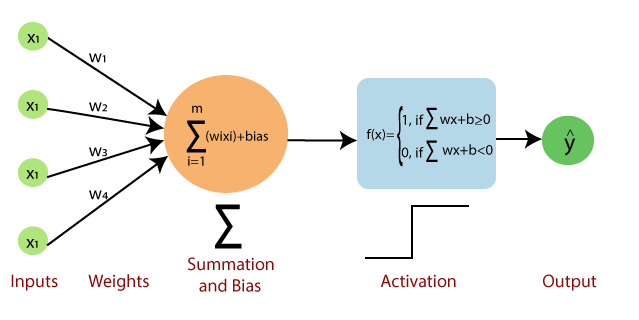
</div>

Perceptron is one of the simplest neural network introduced by Frank Rosenblatt in the late 1950s made specifically for binary classification. 

We will implement the single layer perceptron which is limited to learning seperable patterns. As we have seen our data plots, observing on the WHY this machine learning model is inefficient for this scenario. 

Steps:
- Initialize weights and bias

- Training:

    We compute the weighted sum of inputs with bias (also called net input)
    $${z} = {w}^{T}{x} + {b}$$

- Apply net input to the activation function (Step function, binary threshold as ${a} = {σ(z)}$ ) to get predicted output ( $\hat{y}$ ) where 1 if ${z} >= 0$, 0 if ${z} < 0$

- Weight and Bias update
$$\Delta{w}_{j} = {n}({y}^{(i)} - \hat{y}^{(i)}){x}_{j}^{(i)}$$

$$\Delta{b} = {n}({y}^{(i)} - \hat{y}^{(i)})$$
    
    
${n}$ is the learning rate, a hyperparameter that adjusts the step size of the weight update. The higher the learning rate, we will be taking bigger steps but that means it will overshoot more often. The lower the learning rate, the slower we will reach to the global minimum but with less mistakes.

${y}^{(i)}$ is the true label of ${i}$-th training sample.

$\hat{y}^{(i)}$ is the predicted label of the ${i}$-th training sample.

${y}^{(i)}-\hat{y}^{(i)}$ to calculate the error 

## Perceptron Implementation with Numpy

In [20]:
class Perceptron_Imp:
    """
    Parameters:
    ------------
    eta: float 
        Learning rate (between 0.0 and 1.0)
    n_iters: int
        Epochs over the training set

    Attributes
    -----------
    weights: 1d-array
        Weights after fitting
    bias: Scalar
        Bias unit after fitting
    errors: list
        Number of misclassifications in each epoch
    """

    def __init__(self, eta=0.01, n_iters=10):
        self.eta = eta 
        self.n_iters = n_iters

    def fit(self, X_train, y_train):
        """
        Fit method for training data.

        Parameters
        ------------
        X_train : {array-like}, shape = [n_samples, n_features]
                  Training vectors where n_examples is the number of examples and n_features
                  is the number of features.
        y_train : {array-like}, shape = [n_samples]
                  Target values
        Returns
        ---------
        self : object

        """
        X_train = np.asarray(X_train, dtype=np.float64)
        y_train = np.asarray(y_train, dtype=np.int64)
        self.weights = np.zeros(X_train.shape[1])
        self.bias = 0.0
        self.errors = []

        # Loop through training data based on number of iterations
        for _ in range(self.n_iters):
            errors = 0
            # Loop over each training example 
            for xi, target in zip(X_train, y_train):
                # Calculate update based on the difference between target and prediction
                update = self.eta * (target - self.predict(xi))
                # Update weights
                self.weights+= update * xi
                # Update bias
                self.bias += update
                # If our predicted values matches target values,and the difference is 0, we learned our model
                errors += int(update != 0.0) 
            # Store number of errors 
            self.errors.append(errors)
        return self
    
    def net_input(self, X_train):
        # Calculate dot product of the input features and weights and add bias
        return np.dot(X_train, self.weights) + self.bias
    # Predict class label
    def predict(self, X_train):
        # Apply step function to net input
        return np.where(self.net_input(X_train) >= 0.0, 1, 0)
                

In [21]:
## Fit data
ppn = Perceptron_Imp(eta=0.01, n_iters=80)
ppn.fit(X_train_resampled, y_train_resampled)

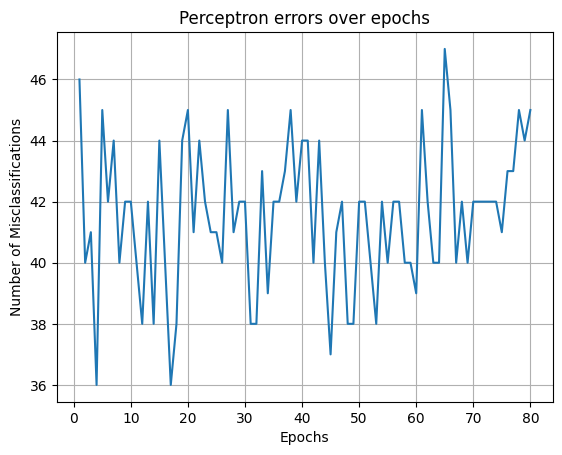

In [22]:
plt.plot(range(1, len(ppn.errors) + 1), ppn.errors)
plt.title('Perceptron errors over epochs')
plt.xlabel('Epochs')
plt.ylabel('Number of Misclassifications')
plt.grid(True)

This displays how the Perceptron Learning Algorithm adjusts its weights during the training process. As the training progresses it attempted to minimize the errors however, the number of misclassifications does not decrease linearly. 

In [23]:
predictions = ppn.predict(X_train_resampled)
print(f"Predictions: {predictions[:30]}")

Predictions: [1 0 1 1 1 0 0 1 1 1 1 1 0 1 0 1 0 1 0 0 0 1 1 0 1 0 1 0 1 0]


## Model Performance with Numpy Implementation
We were able to achieve an 88% accuracy with the perceptron learning algorithm and still capturing some of the data's structure. However. we would need a more complex model for better generalization.

In [24]:
X_test_standard = scaler.transform(X_test)
X_te = np.asarray(X_test_standard, dtype=np.float64)
y_te = np.asarray(y_test, dtype=np.int64)

In [25]:
y_pred = ppn.predict(X_te)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.57      1.00      0.72        42
           1       1.00      0.56      0.71        72

    accuracy                           0.72       114
   macro avg       0.78      0.78      0.72       114
weighted avg       0.84      0.72      0.72       114



## Training Errors from each epoch

In [26]:
print(f"Errors: {ppn.errors}")

Errors: [46, 40, 41, 36, 45, 42, 44, 40, 42, 42, 40, 38, 42, 38, 44, 40, 36, 38, 44, 45, 41, 44, 42, 41, 41, 40, 45, 41, 42, 42, 38, 38, 43, 39, 42, 42, 43, 45, 42, 44, 44, 40, 44, 40, 37, 41, 42, 38, 38, 42, 42, 40, 38, 42, 40, 42, 42, 40, 40, 39, 45, 42, 40, 40, 47, 45, 40, 42, 40, 42, 42, 42, 42, 42, 41, 43, 43, 45, 44, 45]


## Perceptron Implementation with Sickit Learn

In [27]:
#ppn_SK = Perceptron(eta0=0.01, random_state=42)
ppn_SK = imb_make_pipeline(StandardScaler(), SMOTE(random_state=42), Perceptron(max_iter=100, tol=1e-3, random_state=42))
ppn_SK.fit(X_train, y_train)

,steps,"[('standardscaler', ...), ('smote', ...), ...]"
,transform_input,None
,memory,None
,verbose,False
,copy,True
,with_mean,True
,with_std,True
,sampling_strategy,'auto'
,random_state,42
,k_neighbors,5
,penalty,None


In [28]:
y_pred = ppn_SK.predict(X_test)
print('Misclassified examples: %d' % (y_test != y_pred).sum())

Misclassified examples: 18


In [29]:
print('Accuracy: %.3f' % accuracy_score(y_test, y_pred))

Accuracy: 0.842


In [30]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.73      0.90      0.81        42
           1       0.94      0.81      0.87        72

    accuracy                           0.84       114
   macro avg       0.83      0.86      0.84       114
weighted avg       0.86      0.84      0.84       114



## Learning Curve


In [31]:
def plot_learning_curve(estimator, X, y, cv=None, n_jobs=1, train_sizes=np.linspace(0.1, 1.0, 10)):

    train_sizes, train_scores, test_scores =\
    learning_curve(
        estimator = estimator,
        X=X_train,
        y=y_train,
        train_sizes=train_sizes,
        cv=cv, # 10 fold stratified cross valdiation (We will get into more detail)
        n_jobs=n_jobs)

    # Average accuracies from the returned cross validated training
    train_mean = np.mean(train_scores, axis=1)
    train_std = np.std(train_scores, axis=1)
    test_mean = np.mean(test_scores, axis=1)
    test_std = np.std(test_scores, axis=1)

    plt.plot(train_sizes, train_mean, color='red', marker='o',
             markersize=5, label='Training accuracy')
    plt.fill_between(train_sizes,
                     train_mean + train_std,
                     train_mean - train_std,
                     alpha=0.15, color='blue')
    plt.plot(train_sizes, test_mean,
             color='green', linestyle='--',
             marker='s', markersize=5,
             label='Validation accuracy')
    plt.fill_between(train_sizes,
                     test_mean + test_std,
                     test_mean - test_std,
                     alpha=0.15, color='green')

    plt.xlabel('Number of training examples')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.grid()

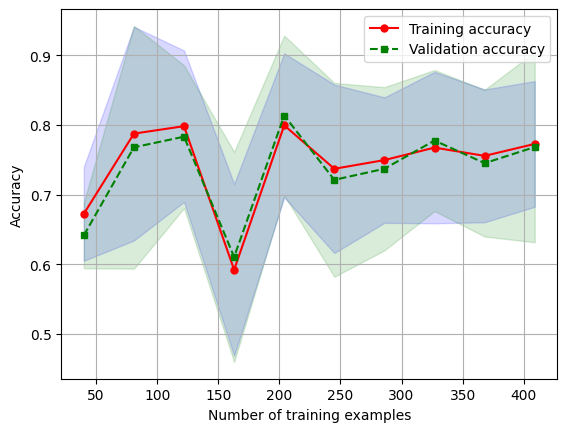

In [32]:
plot_learning_curve(Perceptron(), X_train, y_train, cv=10, train_sizes=np.linspace(0.1, 1.0, 10))

What does this mean?
*

The perceptron learning algorithm failed to converge when the data is not linearly seperable, which we have seen based on the pair plots. Since this data is not linear seperable, the algorithm is unable to find the hyperplane that separates the two classes. No matter how many iterations, it will not find a hyperplane that separates the two classes perfectly and find an optimal solution.

It is observed that the missclassification plot produces different results each time the training is run even though the random seed is fixed. This inconsistency can arise due to several factors, one of which is the random initialization of weights.

# Gradient Descent



Gradient descent can be described as climbing down a hill until a local or global minimum is reached.

<div>
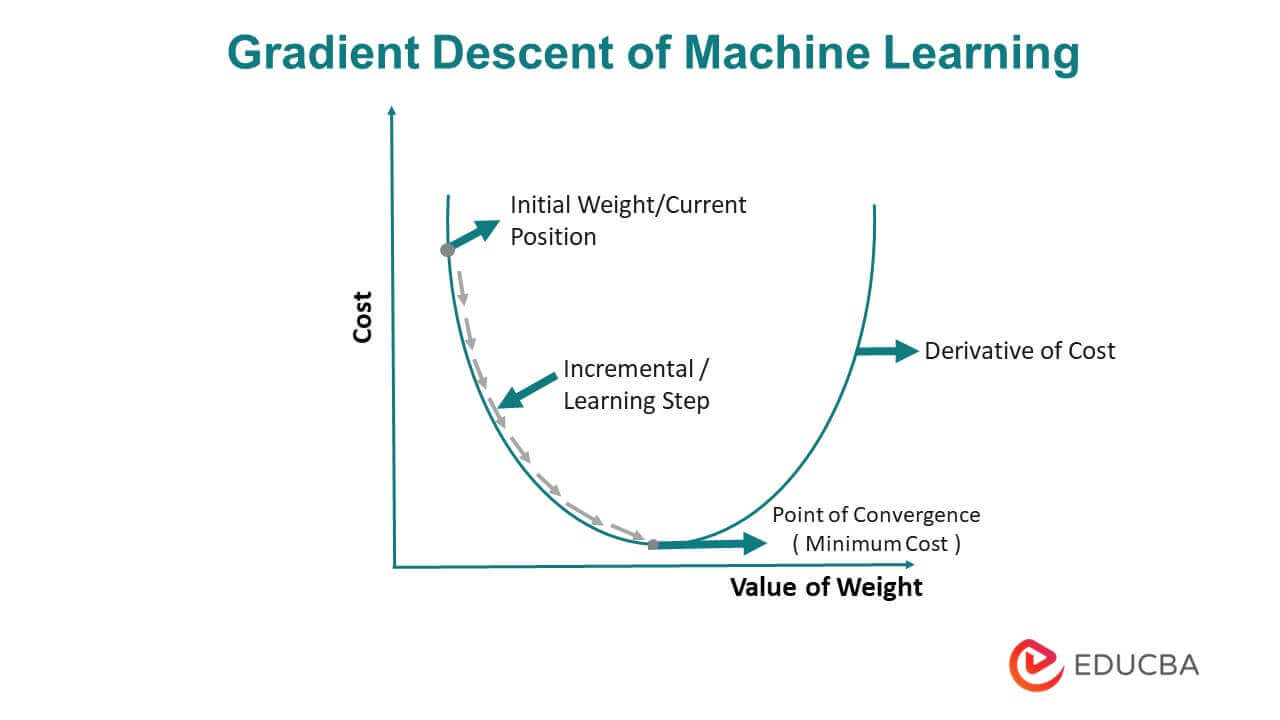
</div>

Minimizing the cost function, we need to move in the diretion opposite to the gradient $▽L(w,b)$


Update:
$$w:= w + \Delta{w}$$ $$b:=b + \Delta{b}$$

The changes in the parameters for weights and bias:

$$\Delta{w} = -n∇_wL(w,b)$$

$$\Delta{b} = -n∇_bL(w,b)$$

Computing the partial derivative of the loss function:

$$\frac{dL}{dw_j} = -\frac{2}{n}\sum \limits _{i} ({y^{(i)} - σ(z^{(i)})x_j^{(i)}}$$

$$\frac{dL}{db_j} = -\frac{2}{n}\sum \limits _{i} ({y^{(i)} - σ(z^{(i)})}$$

## Confusion Matrix

<div>
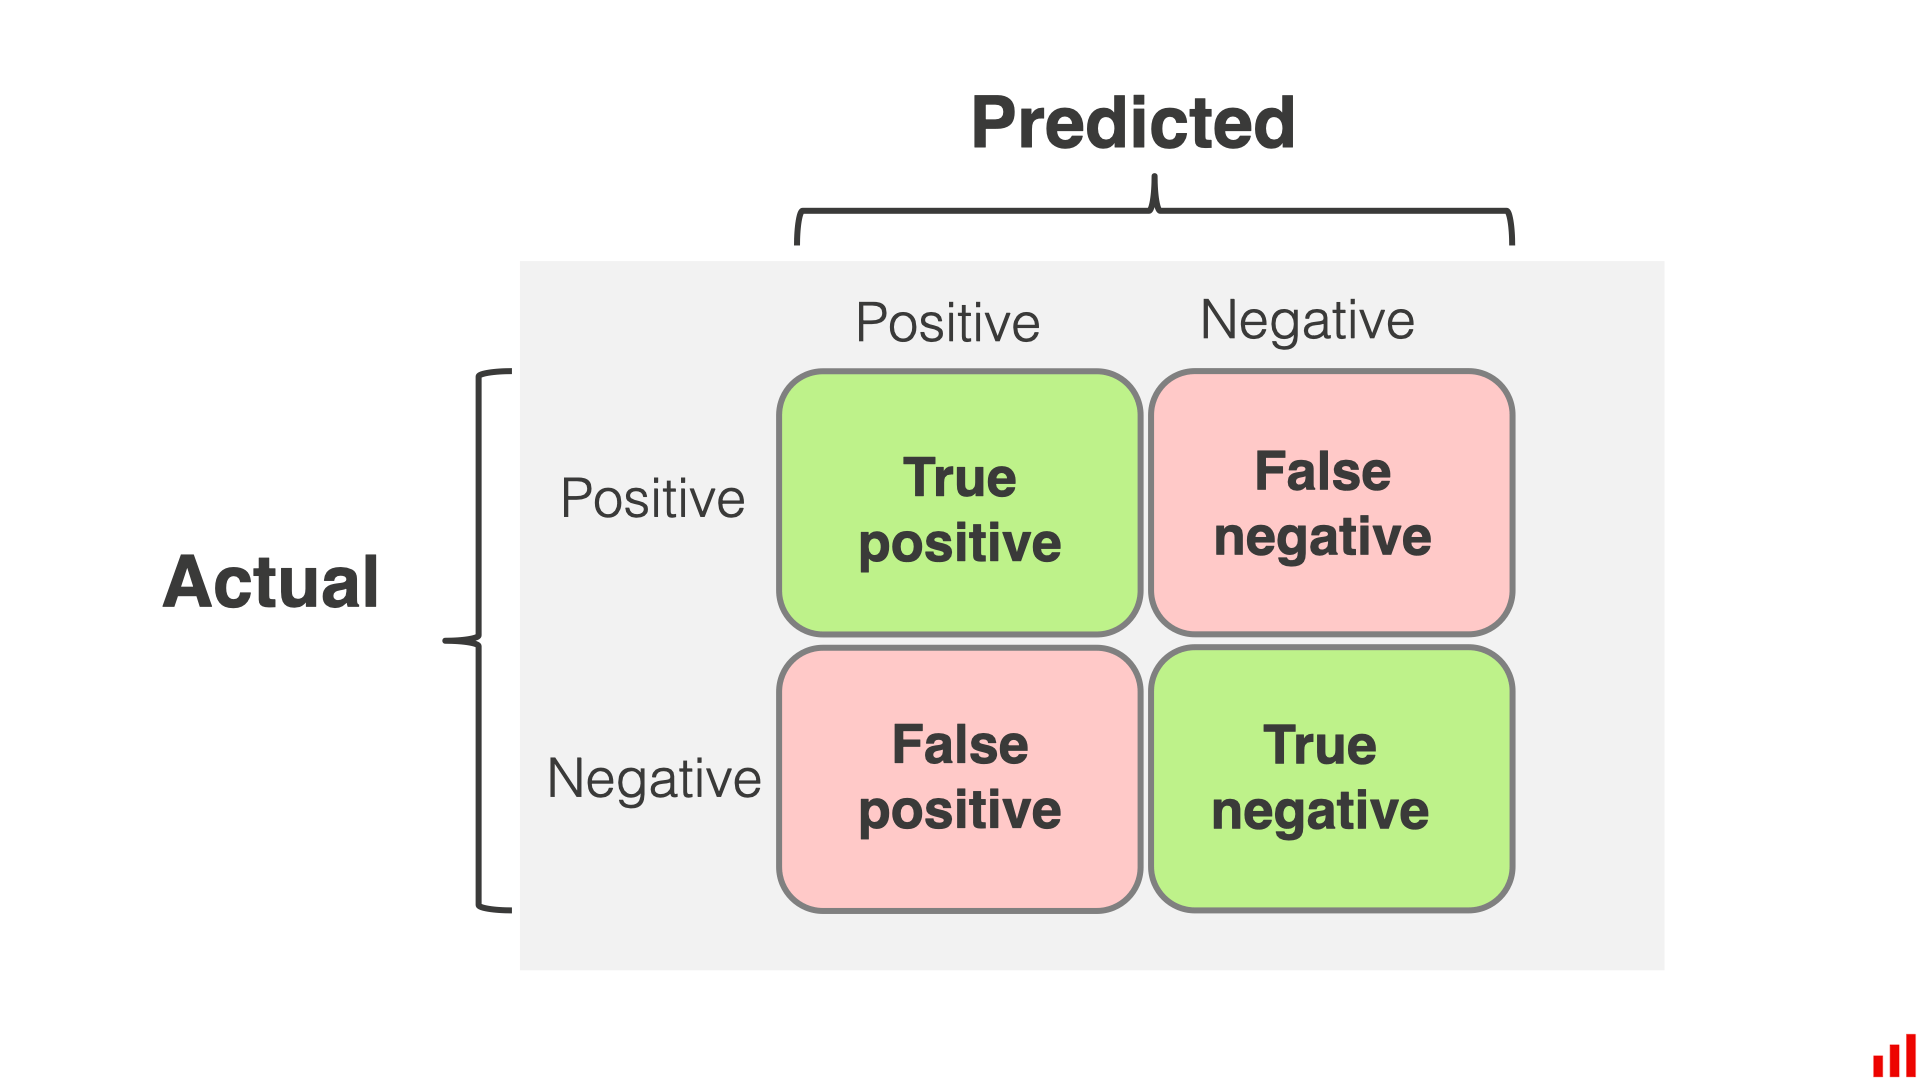
</div>

In [33]:
confusion = confusion_matrix(y_test, y_pred)

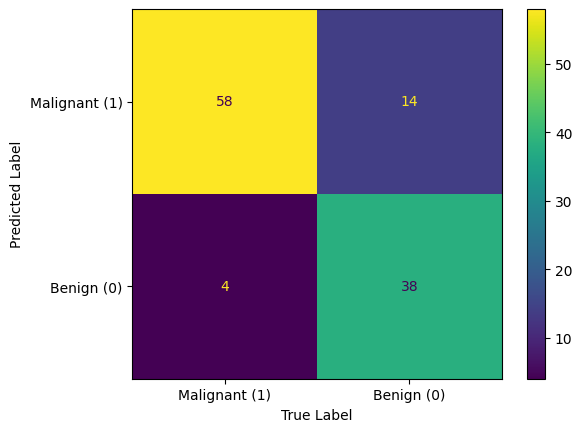

In [34]:
ConfusionMatrixDisplay.from_predictions(
    y_test, y_pred, labels=[1,0], display_labels=["Malignant (1)","Benign (0)"]
)
plt.xlabel("True Label")
plt.ylabel("Predicted Label")
plt.show()

We know that class 1 is Benign and class 0 is Malignant. Our model correctly classified 37 of the examples that belong to Malignant (0) (True Negatives) and 67 examples that belong to Benign (1) (True Positives). Our model incorrectly misclassified 5 examples from class 1 as class 0. 5 examples has been predicted to be benign when it is supposed to be malignant. 

# Multi-Layer Perceptron
MultiLayer Perceptron is a feed forward neural network with an input layer, one or more hidden layers, and an output layer. Each layer applies an affine transform (weights and biases) by a nonlinear activation (sigmoid, ReLU, or tanh). It computes the outputs by forward propagation and learns the parameters by backpropagation plus an optimizer to minimize a loss such as cross entropy. 

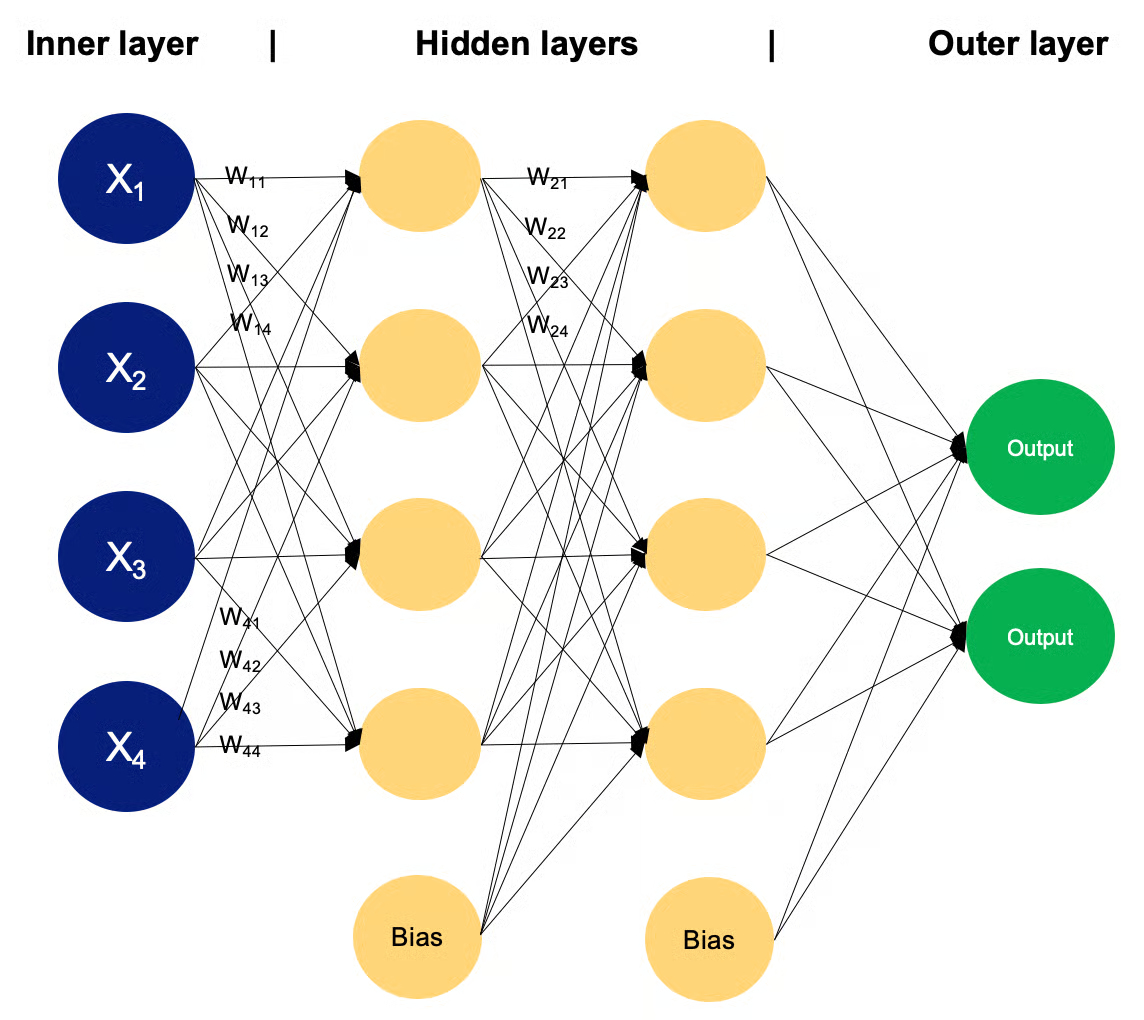


MLP is expected to perform exceptionally better than the single perceptron due to the non linear activations.

# Implementation


In [35]:
params = {'mlpclassifier__hidden_layer_sizes':[(100, 50), (50, ), (50, 25)],
         'mlpclassifier__alpha': [0.0001, 0.001, 0.01]}

In [36]:
# Since MLP is sensitive to feature scaling, we must scale our data
# We use the lbfgs optimization 
MLP_pipe = imb_make_pipeline(StandardScaler(), SMOTE(random_state=42),
                         MLPClassifier(hidden_layer_sizes=(100, 50), activation='relu',
                                       solver='lbfgs', alpha=1e-4, random_state=42)
                        )
                                       

In [37]:
# Hyperparameter tuning
MLP_grid = GridSearchCV(estimator=MLP_pipe, param_grid=params, 
                        scoring='roc_auc')

In [38]:
MLP_grid.fit(X_train, y_train)

,estimator,Pipeline(step...er='lbfgs'))])
,param_grid,"{'mlpclassifier__alpha': [0.0001, 0.001, ...], 'mlpclassifier__hidden_layer_sizes': [(100, ...), (50,), ...]}"
,scoring,'roc_auc'
,n_jobs,None
,refit,True
,cv,None
,verbose,0
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,copy,True


In [39]:
MLP_grid.best_params_

{'mlpclassifier__alpha': 0.01, 'mlpclassifier__hidden_layer_sizes': (50,)}

In [40]:
MLP_grid.best_score_

0.9699690402476779

In [41]:
y_pred_mlp = MLP_grid.predict(X_test)

We have a smooth convergence meaning that losses are improving. 

In [42]:
#y_test = MLP_pipe.predict(X_test)
print(f"{accuracy_score(y_test, y_pred_mlp):.2f}%")

0.90%


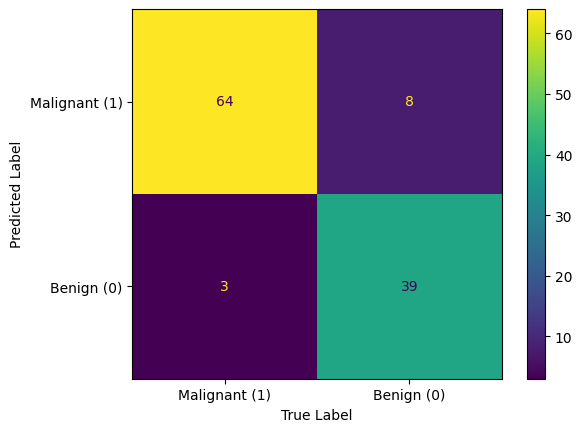

In [43]:
ConfusionMatrixDisplay.from_predictions(
    y_test, y_pred_mlp, labels=[1,0], display_labels=["Malignant (1)","Benign (0)"]
)
plt.xlabel("True Label")
plt.ylabel("Predicted Label")
plt.show()

In [44]:
print(classification_report(y_test, y_pred_mlp))

              precision    recall  f1-score   support

           0       0.83      0.93      0.88        42
           1       0.96      0.89      0.92        72

    accuracy                           0.90       114
   macro avg       0.89      0.91      0.90       114
weighted avg       0.91      0.90      0.90       114



In [45]:
print(recall_score(y_test, y_pred_mlp))

0.8888888888888888


## Implementing Stratified K-Fold 
Stratified K-Fold is a technique used in machine learning for model evaluation, specialized for classification tasks. It improves upon the standard method (K-Fold) by ensuring each fold has approximately the same percentage of samples from each class in the dataset. 

In K-Fold cross validation, the model is trained and validated k times, each time using a different fold as the validation set and the remaining k-1 folds as the training set. In other words, it will help us to obtain reliable estimates of the model's generalization performance. 

In [46]:
kf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

In [47]:
# 
splits = list(kf.split(X,y))
count = 1
for train_i, test_i in splits:
    print(f'Fold: {count}, Training set: {len(train_i)}, Testing set: {len(test_i)}')
    count+=1

Fold: 1, Training set: 455, Testing set: 114
Fold: 2, Training set: 455, Testing set: 114
Fold: 3, Training set: 455, Testing set: 114
Fold: 4, Training set: 455, Testing set: 114
Fold: 5, Training set: 456, Testing set: 113


In [48]:
scoring = {"acc": "accuracy", "f1":"f1", "auc":"roc_auc", "bacc": "balanced_accuracy"}
cv_res = cross_validate(ppn_SK, X_train, y_train, cv=kf,
                     scoring=scoring,n_jobs=-1)
print(f"{cv_res["test_auc"].mean():.2f}", f"{cv_res["test_auc"].std():.3f}")

0.98 0.013


In [49]:

cv_res = cross_validate(MLP_grid, X_train, y_train, cv=kf,
                     scoring=scoring,n_jobs=-1)
print(f"{cv_res["test_auc"].mean():.2f}", f"{cv_res["test_auc"].std():.3f}")

0.97 0.019


In [50]:
# Perceptron
ppn_SK.fit(X_train, y_train)
y_hat_p = ppn_SK.predict(X_test)

# MLP
MLP_grid.fit(X_train, y_train)
y_hat_m = MLP_grid.predict(X_test)
y_prob_m = MLP_grid.predict_proba(X_test)[:,1]

print("Perceptron\n", classification_report(y_test, y_hat_p, digits=3))
print("MLP\n", classification_report(y_test, y_hat_m, digits=3))
print("MLP Test AUC:", roc_auc_score(y_test, y_prob_m))
print("MLP Confusion matrix:\n", confusion_matrix(y_test, y_hat_m, labels=[1, 0]))

Perceptron
               precision    recall  f1-score   support

           0      0.731     0.905     0.809        42
           1      0.935     0.806     0.866        72

    accuracy                          0.842       114
   macro avg      0.833     0.855     0.837       114
weighted avg      0.860     0.842     0.845       114

MLP
               precision    recall  f1-score   support

           0      0.830     0.929     0.876        42
           1      0.955     0.889     0.921        72

    accuracy                          0.904       114
   macro avg      0.893     0.909     0.899       114
weighted avg      0.909     0.904     0.904       114

MLP Test AUC: 0.9589947089947091
MLP Confusion matrix:
 [[64  8]
 [ 3 39]]


We got an exceptional recall metric result from the MLP model, that determines the true positives of malignant cases. 

## Key Takeaways

We modeled breast-cancer diagnosis on a mildly imbalanced dataset (~63:37) using a leakage-safe pipeline (StandardScaler → SMOTE → MLPClassifier, solver='lbfgs') tuned with GridSearchCV. On the held-out test set, the best MLP achieved ROC AUC ≈ 0.959, accuracy ≈ 0.904, and balanced class performance (recall ≈ 0.93/0.89, precision ≈ 0.83/0.96 across the two classes). This outperforms the Perceptron baseline (accuracy ≈ 0.842) and delivers higher recall for the malignant class with only a small precision trade-off. Five-fold stratified cross-validation showed similar results, indicating stable generalization despite the modest size and imbalance.

## Areas for Improvement

Threshold tuning to reduce false negatives without excessive false positives.